2024-10-29 09:24:16,693 - INFO - Max length across specified columns: 4096
2024-10-29 09:24:16,693 - INFO - ['true_answer_embedding_llama3.1', 'llm-correct-answers_embedding_llama3.1']
2024-10-29 09:24:16,693 - INFO - Padding applied. Reduced embeddings shape: (30, 2)


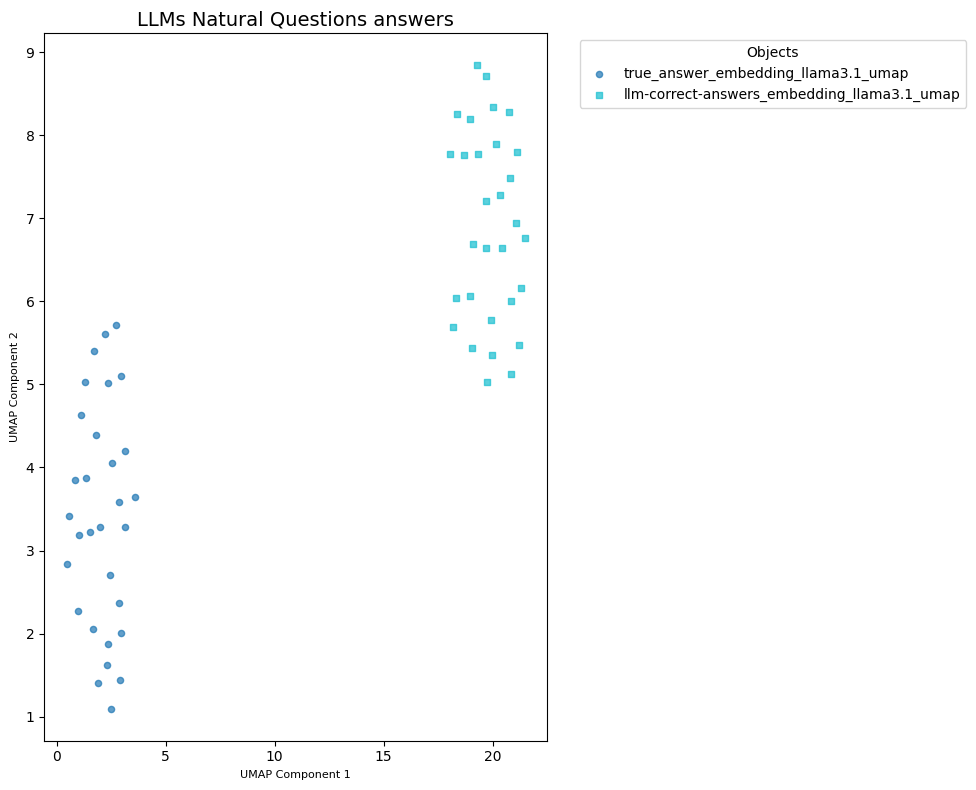

In [2]:
from src.services.embedding_visualizer_service import EmbeddingVisualizer
import pandas as pd     

# Read LLM answers
llm_true_answers_with_embeddings = pd.read_csv('./data/llm_responses/NQ-llm-true-answers-with-embeddings.csv')
llm_correct_answers = pd.read_csv('./data/llm_responses/NQ-llm-correct-answers.csv')

# Rename column in llm_correct_answers
llm_correct_answers = llm_correct_answers.rename(columns={'embedding_llama3.1': 'llm-correct-answers_embedding_llama3.1'})

# Concatenate datasets, keeping only the required columns
df_combined = pd.concat([
    llm_true_answers_with_embeddings[['true_answer_embedding_llama3.1']],
    llm_correct_answers[['llm-correct-answers_embedding_llama3.1']]
], axis=1)

# Display the combined DataFrame
# print(df_combined)

vis = EmbeddingVisualizer(df=df_combined)
vis.convert_columns_to_float_arrays()
vis.process_embeddings_padding()
vis.apply_umap(n_components=2)
vis.plot_umap_2d(title="NQ correct answers VS LLM answers", save_path='./results_imgs/umap_2d.png')